## Project 1: Monte Carlo Simulations
Emily Daskas

In [15]:
#Emily Daskas
import random
import matplotlib.pyplot as plt

#### Ascending Clock Auction

In [16]:
#generates a specified number of buyers with values randomly chosen between 0 and 100, 
#with an increment of 5.
def generate_buyers(num_buyers):
    buyers = []
    for buyer in range(num_buyers):
        buyers.append((random.randrange(0, 101, 5)))
    return buyers

In [17]:
#generates a random reserve price
def generate_reserve_price():
    return random.randrange(0, 101, 5)

In [18]:
#runs the auction recursively
#when the auction ends, it returns the revenue
def ascending_clock_auction(bidders, reserve, clock_increment, bid = None, current_price = None):
    remaining_bidders = []
    
    #at the start of the auction, set the current auction price ot the reserve (starting price)
    if bid == None:
        current_price = reserve
        
    #only keep bidders who meet the current price
    for bidder in bidders:
        if bidder >= current_price:
            remaining_bidders.append(bidder) 

    #if none of the bidders meet the starting price (reserve), revenue will be 0
    if bid == None and len(remaining_bidders) == 0: 
        return 0
            
    #auction is not over, set bid price and increment current price by clock increment, and run function again
    if len(remaining_bidders) > 1:
        bid = current_price
        current_price += clock_increment
        return ascending_clock_auction(remaining_bidders, reserve, clock_increment, bid, current_price)
      
    #if one bidder remains, revenue is the last bidding price with multiple bidders or reserve price if the prior does not meet reserve price
    elif len(remaining_bidders) == 1:
        if bid == None:
            bid = current_price
        if bid >= reserve:
            return bid
        else:
            return reserve
    
    #if no bidders remain, revenue last bid price
    else:
        return bid
    

In [19]:
#runs monte carlo of ascending clock auction
def ascending_clock_Monte_Carlo(num_buyers, clock_increment, samples = 1000):
    rev_sum = 0
    for i in range(samples):
        rev_sum += ascending_clock_auction(generate_buyers(num_buyers), 0, clock_increment)
    return(rev_sum/ samples)

In [20]:
print("\nExpected value with 5 buyers and $1 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(5, 1)))
print("\nExpected value with 5 buyers and $10 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(5, 10)))
print("\nExpected value  with 20 buyers and $1 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(20, 1)))


Expected value with 5 buyers and $1 clock increment:  $68.61

Expected value with 5 buyers and $10 clock increment:  $65.65

Expected value  with 20 buyers and $1 clock increment:  $92.47


With the above results we can see that the having a larger clock increment (in our case, at least, changing the clock increment from 1 to 10) decreases the expected value by a small amount. This makes sense because with an ascending clock auction, the revenue will be the value of the last time multiple buyers placed a bid. Thus, if the clock increment is higher, we may have to skip back further to get the expected value. As an example, if we have 5 bidders: [20, 25, 30, 35, 40], and a clock increment of \\$1. The last time that 2 bidders bid would be at price 35, so the revenue would be 35. On the other hand, if we had a clock increment of $10, the last time that we would have 2 bidders is at price \\$30, so our revenue would be \\$30, slighlty less than our clock increment of \\$1.

Now, we see that with 20 buyers we get a much higher expected value than only 5 buyers. This is because with 20 buyers, we have a much higher chance that there will be buyers with higher values. When bidders have higher values, or budgets, the auction will have a higher revenue.

In [21]:
#finds the optimal reserve price, all of the reserve prices as well as their respective revenues
def find_reserve_price():
    reserve_price_array = []
    revenue_array = []
    samples = 10000
    for reserve_price in range(0,101,5):
        reserve_price_array.append(reserve_price)
        revs = 0
        for i in range(samples):
            revs += ascending_clock_auction(generate_buyers(5), reserve_price, 5)
        revenue_array.append(revs/samples)
    return reserve_price_array, revenue_array, reserve_price_array[revenue_array.index(max(revenue_array))]

<BarContainer object of 21 artists>

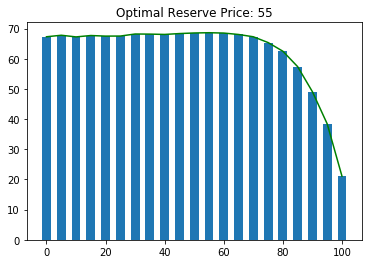

In [22]:
reserve_price_array, revenue_array, optimal_price = find_reserve_price()
plt.title("Optimal Reserve Price: %1.d" % optimal_price)
plt.plot(reserve_price_array, revenue_array, color = 'g')
plt.bar(reserve_price_array, revenue_array, width = 3)


You can see on the above visualization that up until \\$65 the revenues are pretty consistent, and take a big dip after as the reserve increases. However, when running this monte carlo simulation, we cna see that the optimal reserve price, although not much higher than lower reserve prices, is consistently either \\$55 and \\$60.  These generate the highest revenues.

#### Vegas Hotel Projections

In [23]:
# generates a profile for the competitor
def generate_competitor_profile():
    profile = [0]
    for i in range (1,10):
        #if it is the first index or the last index in current array = 0, choose between 0 and 1 for next index
        if profile[-1] == 0:
            profile.append(random.randint(profile[-1], profile[-1]+1))
        else:
            #if there are two in a row equal to eachother 
            #(it takes 2 years to build a hotel), we choose between current hotel and starting a new hotel
            if profile[-1] == profile[-2]:
                profile.append(random.randint(profile[-1], profile[-1]+1))
            #if it has not been 2 years yet, we keep building same hotel
            else:
                profile.append(profile[-1])
        
    return(profile)

In [24]:
#using a competitor profile, the function forcasts the profit using the giving model
def forecast_profit(competitor_profile):
    profit = 0
    for i in range(0,len(competitor_profile)):
        profit += (750 + 50*(i+1))/(competitor_profile[i]+1)  
    return profit

In [25]:
#testing example
forecast_profit([0,1,1,2,2,2,3,3,3,3])

3850.0

In [26]:
#gets all the profile options into a set so that we can randomly sample from it, 
#giving each profile option an equal chance of being picked
def get_profile_options(): 
    profile_options = []
    for i in range(100000):
        profile = generate_competitor_profile()
        if profile not in profile_options:
            profile_options.append(profile)
    profile_options.sort()
    return profile_options

profile_options = get_profile_options()

In [27]:
#uses a monte carlo simulation to get the expected profit
def expected_value_monte_carlo():
    total_profits = 0
    for i in range(1000):
        total_profits += forecast_profit(random.choice(profile_options))
    return(total_profits/1000)
        

In [28]:
print("The expected profit is", "${:,.2f}".format(expected_value_monte_carlo()))

The expected profit is $5,340.08
